# WORLD HAPPINESS ANALYSIS 2023

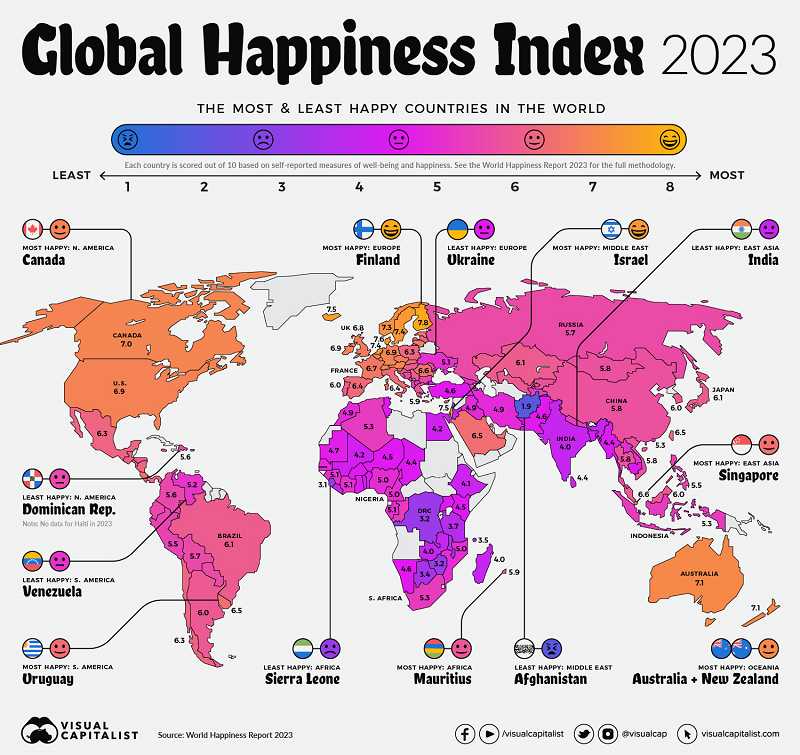

In [22]:
pic = Image.open(r"C:\Users\ACER SPIN3\Downloads\worlds-happiest-countries-2023_2.png")
pic

## About Data

The dataset utilized in this study contains comprehensive metrics to evaluate the happiness level across different countries. Key variables: "Happiness Score," "Logged GDP," "Social support," "Healthy life expectancy," "Freedom to make life choices," "Generosity," and "Perceptions of corruption." This rich dataset provides a unique opportunity to explore the complex dynamics that contribute to national happiness levels.

## Data Source
The dataset for this study was sourced from Kaggle, specifically from the World Happiness Report 2023 provided by user Joe Beach Capital. The dataset is available at Kaggle World Happiness Report 2023. This dataset is an invaluable resource that includes a variety of metrics related to happiness, economy, social support, and health among others, allowing for a robust analysis and modeling.


## Objectives

* Exploratory Data Analysis (EDA): To understand the distribution, trends, and correlations among variables.
* Correlation Analysis: To identify the relationship between happiness and various factors like GDP, social support, and freedom.
* Comparative Analysis: To compare the top 10 happiest countries with the bottom 10, focusing on their key characteristics.
* Predictive Modeling: To develop a machine learning model that can predict a country's happiness score based on the other variables in the dataset.


In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:

df = pd.read_csv(r'C:\Users\ACER SPIN3\Downloads\World Happiness Report 2023.csv')

df.head()

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110


In [25]:
df.columns

Index(['Country name', 'Ladder score', 'Standard error of ladder score',
       'upperwhisker', 'lowerwhisker', 'Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

## Data Preparation

In [26]:
##dropped the not needed columns based on my specific tasks

df.drop(['Standard error of ladder score',
       'upperwhisker', 'lowerwhisker','Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],axis = 1, inplace =True)

In [27]:
df.columns

Index(['Country name', 'Ladder score', 'Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia'],
      dtype='object')

In [28]:
df['Country name'].nunique()

137

In [29]:
df['Country name'].unique()

array(['Finland', 'Denmark', 'Iceland', 'Israel', 'Netherlands', 'Sweden',
       'Norway', 'Switzerland', 'Luxembourg', 'New Zealand', 'Austria',
       'Australia', 'Canada', 'Ireland', 'United States', 'Germany',
       'Belgium', 'Czechia', 'United Kingdom', 'Lithuania', 'France',
       'Slovenia', 'Costa Rica', 'Romania', 'Singapore',
       'United Arab Emirates', 'Taiwan Province of China', 'Uruguay',
       'Slovakia', 'Saudi Arabia', 'Estonia', 'Spain', 'Italy', 'Kosovo',
       'Chile', 'Mexico', 'Malta', 'Panama', 'Poland', 'Nicaragua',
       'Latvia', 'Bahrain', 'Guatemala', 'Kazakhstan', 'Serbia', 'Cyprus',
       'Japan', 'Croatia', 'Brazil', 'El Salvador', 'Hungary',
       'Argentina', 'Honduras', 'Uzbekistan', 'Malaysia', 'Portugal',
       'South Korea', 'Greece', 'Mauritius', 'Thailand', 'Mongolia',
       'Kyrgyzstan', 'Moldova', 'China', 'Vietnam', 'Paraguay',
       'Montenegro', 'Jamaica', 'Bolivia', 'Russia',
       'Bosnia and Herzegovina', 'Colombia', 'Domin

In [30]:
# Rename countries 
df.rename(index=str, columns={
    'Country name': 'Country'
}, inplace=True)


In [31]:
df['Country']

0               Finland
1               Denmark
2               Iceland
3                Israel
4           Netherlands
             ...       
132    Congo (Kinshasa)
133            Zimbabwe
134        Sierra Leone
135             Lebanon
136         Afghanistan
Name: Country, Length: 137, dtype: object

In [32]:
#correct the names of congos

df['Country'].replace({
    'Congo (Kinshasa)': 'DR Congo',
    'Congo (Brazzaville)': 'Republic of the Congo'
}, inplace=True)


In [33]:
import requests


# Fetch data from the REST Countries API
response = requests.get('https://restcountries.com/v3.1/all')
data = response.json()

##MAPPINGS
country_to_continent = {}
country_to_iso = {}
for country_data in data:
    country_name = country_data.get('name', {}).get('common', None)
    continent = country_data.get('region', None)
    iso_code = country_data.get('cca2', None)
    
    if country_name and continent:
        country_to_continent[country_name] = continent
    if country_name and iso_code:
        country_to_iso[country_name] = iso_code



# Map the Continent and ISO 
df['Continent'] = df['Country'].map(country_to_continent)
df['ISO_Code'] = df['Country'].map(country_to_iso)

# UNMATCHED COUNTRIES
df['Continent'].fillna('Unknown', inplace=True)
df['ISO_Code'].fillna('Unknown', inplace=True)


In [34]:

df['Continent'].unique()

array(['Europe', 'Asia', 'Oceania', 'Americas', 'Unknown', 'Africa'],
      dtype=object)

### check for the unknown cntinents and fix 

In [35]:

unknown_continent = df[df['Continent'] == 'Unknown'].shape[0]
print(f"Number of countries with unknown continent: {unknown_continent}")


Number of countries with unknown continent: 4


In [36]:
unknown_continent_countries = df[df['Continent'] == 'Unknown']['Country'].unique()
print("Countries with unknown continent:", unknown_continent_countries)


Countries with unknown continent: ['Taiwan Province of China' 'Hong Kong S.A.R. of China'
 'State of Palestine' 'Turkiye']


In [37]:
# lets Manually update the Continent and ISO_Code for these special cases
# Rename Turkiye to 'Turkey'
df['Country'].replace({'Turkiye': 'Turkey'}, inplace=True)


manual_continent_mapping = {
    'Taiwan Province of China': 'Asia',
    'Hong Kong S.A.R. of China': 'Asia',
    'State of Palestine': 'Asia',
    'Turkey': 'Europe', 
    
}

manual_iso_mapping = {
    'Taiwan Province of China': 'TWN',
    'Hong Kong S.A.R. of China': 'HKG',
    'State of Palestine': 'PSE',
    'Turkey': 'TUR',
    
}

df['Continent'] = df['Country'].apply(lambda x: manual_continent_mapping.get(x, df.loc[df['Country'] == x, 'Continent'].iloc[0]))
df['ISO_Code'] = df['Country'].apply(lambda x: manual_iso_mapping.get(x, df.loc[df['Country'] == x, 'ISO_Code'].iloc[0]))


In [38]:
df['ISO_Code'].unique()

array(['FI', 'DK', 'IS', 'IL', 'NL', 'SE', 'NO', 'CH', 'LU', 'NZ', 'AT',
       'AU', 'CA', 'IE', 'US', 'DE', 'BE', 'CZ', 'GB', 'LT', 'FR', 'SI',
       'CR', 'RO', 'SG', 'AE', 'TWN', 'UY', 'SK', 'SA', 'EE', 'ES', 'IT',
       'XK', 'CL', 'MX', 'MT', 'PA', 'PL', 'NI', 'LV', 'BH', 'GT', 'KZ',
       'RS', 'CY', 'JP', 'HR', 'BR', 'SV', 'HU', 'AR', 'HN', 'UZ', 'MY',
       'PT', 'KR', 'GR', 'MU', 'TH', 'MN', 'KG', 'MD', 'CN', 'VN', 'PY',
       'ME', 'JM', 'BO', 'RU', 'BA', 'CO', 'DO', 'EC', 'PE', 'PH', 'BG',
       'NP', 'AM', 'TJ', 'DZ', 'HKG', 'AL', 'ID', 'ZA', 'CG', 'MK', 'VE',
       'LA', 'GE', 'GN', 'UA', 'CI', 'GA', 'NG', 'CM', 'MZ', 'IQ', 'PSE',
       'MA', 'IR', 'SN', 'MR', 'BF', 'NA', 'TUR', 'GH', 'PK', 'NE', 'TN',
       'KE', 'LK', 'UG', 'TD', 'KH', 'BJ', 'MM', 'BD', 'GM', 'ML', 'EG',
       'TG', 'JO', 'ET', 'LR', 'IN', 'MG', 'ZM', 'TZ', 'KM', 'MW', 'BW',
       'CD', 'ZW', 'SL', 'LB', 'AF'], dtype=object)

In [39]:
df['Continent'].unique()

array(['Europe', 'Asia', 'Oceania', 'Americas', 'Africa'], dtype=object)

In [40]:
df.head()

,Country,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Continent,ISO_Code
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,Europe,FI
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,1.778,Europe,DK
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,1.778,Europe,IS
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,Asia,IL
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,1.778,Europe,NL


In [41]:
##check for null

df.isnull().sum()

Country                         0
Ladder score                    0
Logged GDP per capita           0
Social support                  0
Healthy life expectancy         1
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Ladder score in Dystopia        0
Continent                       0
ISO_Code                        0
dtype: int64

In [42]:
##print null
null_rows = df[df['Healthy life expectancy'].isna()].T

print(null_rows)


                                              98
Country                       State of Palestine
Ladder score                               4.908
Logged GDP per capita                      8.716
Social support                             0.859
Healthy life expectancy                      NaN
Freedom to make life choices               0.694
Generosity                                -0.132
Perceptions of corruption                  0.836
Ladder score in Dystopia                   1.778
Continent                                   Asia
ISO_Code                                     PSE


In [43]:
df['Healthy life expectancy'].fillna(df['Healthy life expectancy'].mean(), inplace=True)


In [44]:
##rebame ladder_score
df.rename(columns={'Ladder score': 'Happiness Score'}, inplace=True)


In [45]:
df.duplicated().sum()

0

No duplicated values

## Fixed and prepared... ready to analyse 

In [48]:
df.shape

(137, 11)

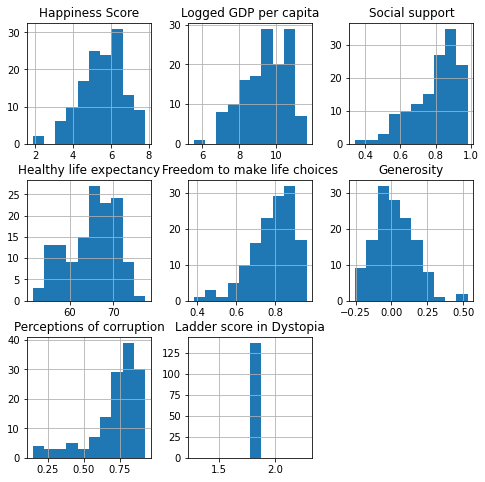

In [49]:
##distribution of data

df.hist(figsize = (8,8))
plt.show()

In [50]:
Q1 = df['Happiness Score'].quantile(0.25)
Q3 = df['Happiness Score'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Happiness Score'] < (Q1 - 1.5 * IQR)) | (df['Happiness Score'] > (Q3 + 1.5 * IQR))].T

# Print the outliers
print("Outliers in 'Happiness Score':")
print(outliers)


Outliers in 'Happiness Score':
                                      136
Country                       Afghanistan
Happiness Score                     1.859
Logged GDP per capita               7.324
Social support                      0.341
Healthy life expectancy            54.712
Freedom to make life choices        0.382
Generosity                         -0.081
Perceptions of corruption           0.847
Ladder score in Dystopia            1.778
Continent                            Asia
ISO_Code                               AF


<AxesSubplot:xlabel='Happiness Score'>

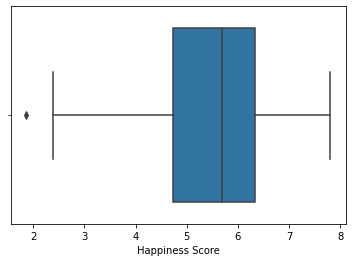

In [51]:

sns.boxplot(x=df['Happiness Score'])


In [52]:
df['Happiness Score'].max()  #this is the maximum happiness level

7.804

In [53]:
df['Happiness Score'].min() 


1.859

this is the minimum happiness level, which is out of the interquartile range , wow they must really be unhappy

 # EDA Questions

## A. Happiness Levels

### 1.	Which countries have the highest and lowest happiness levels?

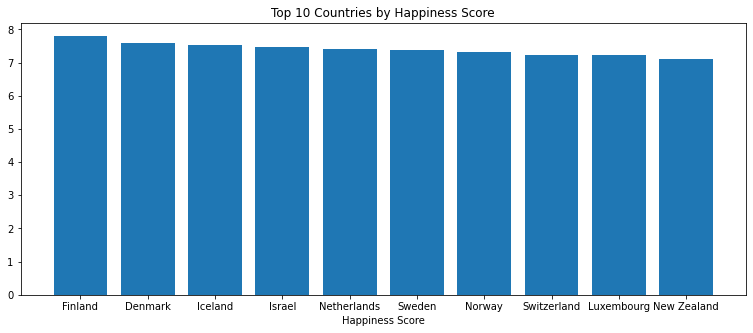

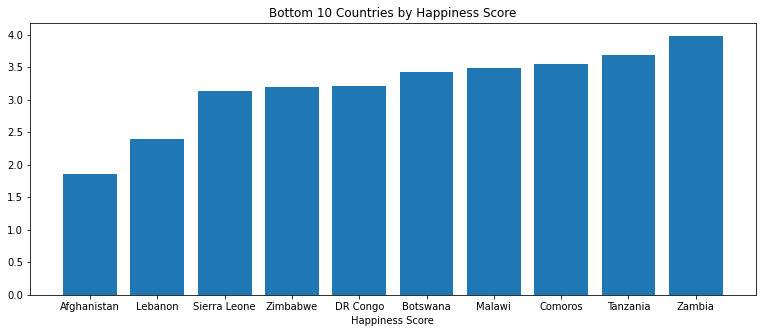

In [54]:
top_10_countries = df.sort_values(by='Happiness Score', ascending=False).head(10)
bottom_10_countries = df.sort_values(by='Happiness Score', ascending=True).head(10)




# For top 10 countries
plt.figure(figsize=[13,5])
plt.bar(top_10_countries['Country'], top_10_countries['Happiness Score'])
plt.xlabel('Happiness Score')
plt.title('Top 10 Countries by Happiness Score')
plt.show()

# For bottom 10 countries
plt.figure(figsize=[13,5])
plt.bar(bottom_10_countries['Country'], bottom_10_countries['Happiness Score'])
plt.xlabel('Happiness Score')
plt.title('Bottom 10 Countries by Happiness Score')
plt.show()


#### Top 10 Happiest Countries
Continent: Primarily European countries, with one from Asia and one from Oceania.
Happiness Score: Ranging from 7.123 (New Zealand) to 7.804 (Finland).
GDP: High GDP per capita, ranging from 10.662 (New Zealand) to 11.660 (Luxembourg).
Social Support: Extremely high, generally above 0.9.
Healthy Life Expectancy: Above 70 years in all countries.
Freedom to Make Life Choices: High, generally above 0.8.
Generosity: Generally positive but varies.
Perceptions of Corruption: Generally low, below 0.5 for most.

#### Bottom 10 Happiest Countries
Continent: Primarily African countries, with two from Asia.
Happiness Score: Ranging from 1.859 (Afghanistan) to 3.982 (Zambia).
GDP: Lower GDP per capita, ranging from 7.007 (DR Congo) to 9.629 (Botswana).
Social Support: Much lower, generally below 0.7.
Healthy Life Expectancy: Generally below 60 years.
Freedom to Make Life Choices: Lower, generally around 0.5–0.8.
Generosity: Mixed but generally lower, even negative in some cases.
Perceptions of Corruption: High, generally above 0.7.

#### IN  Summary

The top 10 happiest countries generally have higher GDP per capita, better social support, and longer healthy life expectancies compared to the bottom 10 countries. They also generally perceive lower levels of corruption and enjoy more freedom to make life choices. The top 10 are predominantly in Europe, while the bottom 10 are primarily in Africa and Asia.





    


### 2.	How does the Happiness score compare to the score in Dystopia?

In [55]:
mean_difference = df['Happiness Score'].mean() - df['Ladder score in Dystopia'].mean()
print(f"The mean difference between Happines score and Happiness Score in Dystopia is {mean_difference:.2f}")


The mean difference between Happines score and Happiness Score in Dystopia is 3.76


This indicates that, on average, the actual "Happiness Score" is 3.76 points higher than the Score in Dystopia" across the countries
This implies that countries are generally happier compared to the dystopic benchmark set in the data.

### 3.	Are there any regional trends in Happiness Level ?

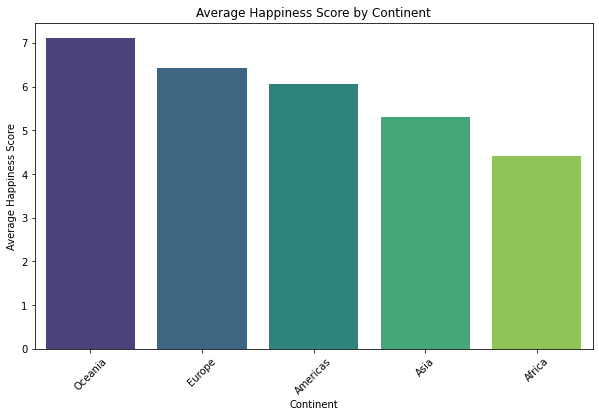

In [56]:

grouped_by_continent = df.groupby('Continent')['Happiness Score'].mean().sort_values(ascending=False)


plt.figure(figsize=[10, 6])
sns.barplot(x=grouped_by_continent.index, y=grouped_by_continent.values, palette='viridis')
plt.xlabel('Continent')
plt.ylabel('Average Happiness Score')
plt.title('Average Happiness Score by Continent')
plt.xticks(rotation=45)
plt.show()


The data suggests that continents with higher GDPs, better social support systems, and lower perceptions of corruption generally have higher average happiness scores. Oceania and Europe stand out as particularly happy continents, while Africa lags behind. The Americas and Asia fall in between, maybe perhaps a wider variance in living conditions and governance across their countries.

It would be interesting to delve deeper into why these differences exist and how different factors contribute to happiness in each continent.

## B. Economic Prosperity

### How strongly does Logged GDP per capita correlate with Happiness Score?

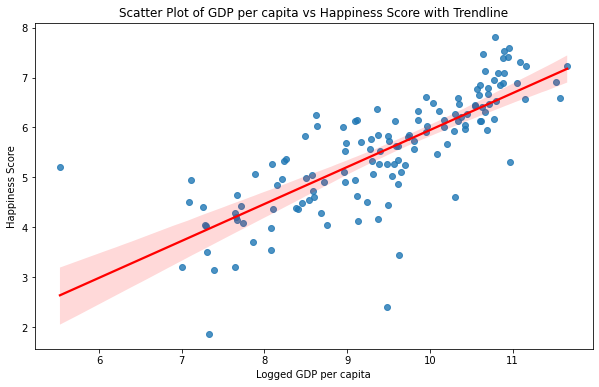

In [57]:


plt.figure(figsize=[10, 6])


sns.regplot(x='Logged GDP per capita', y='Happiness Score', data=df, line_kws={'color': 'red'})

plt.xlabel('Logged GDP per capita')
plt.ylabel('Happiness Score')
plt.title('Scatter Plot of GDP per capita vs Happiness Score with Trendline')
plt.show()


In [58]:
correl_matrix = df[['Logged GDP per capita', 'Happiness Score']].corr()
print(correl_matrix)


                       Logged GDP per capita  Happiness Score
Logged GDP per capita               1.000000         0.784367
Happiness Score                     0.784367         1.000000


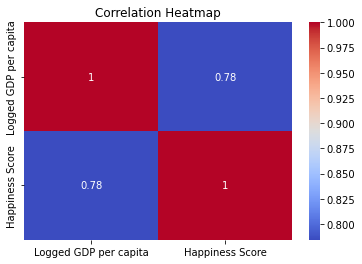

In [59]:
sns.heatmap(correl_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


While this is a strong correlation, it's important to note that it's not perfect (not 1 or -1). This suggests that while economic prosperity can be a significant factor in determining happiness, it's not the only factor. Other variables, such as social support, freedom, and health, likely play a role as well. Moreover, this is a correlational finding, which means we can't say that higher GDP per capita causes higher happiness scores; we can only say that they tend to go together.

In a nutshell, if you find yourself in a country with a higher GDP per capita, the odds are that you'll also find a generally happier population. However, money isn't everything, and it's crucial to consider other aspects that contribute to a fulfilling life.

## Are there countries with high GDP but low happiness or vice versa?

In [60]:
from scipy.stats import zscore


df['GDP_Zscore'] = zscore(df['Logged GDP per capita'])
df['Happiness_Zscore'] = zscore(df['Happiness Score'])

outliers = df[(df['GDP_Zscore'] > 2) | (df['GDP_Zscore'] < -2) | (df['Happiness_Zscore'] > 2) | (df['Happiness_Zscore'] < -2)]

outliers


,Country,Happiness Score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Continent,ISO_Code,GDP_Zscore,Happiness_Zscore
87,Venezuela,5.211,5.527,0.839,64.050,0.659,0.128,0.811,1.778,Americas,VE,-3.261148,-0.289494
132,DR Congo,3.207,7.007,0.652,55.375,0.664,0.086,0.834,1.778,Africa,CD,-2.030775,-2.053950
133,Zimbabwe,3.204,7.641,0.690,54.050,0.654,-0.046,0.766,1.778,Africa,ZW,-1.503711,-2.056591
134,Sierra Leone,3.138,7.394,0.555,54.900,0.660,0.105,0.858,1.778,Africa,SL,-1.709050,-2.114702
135,Lebanon,2.392,9.478,0.530,66.149,0.474,-0.141,0.891,1.778,Asia,LB,0.023447,-2.771530
136,Afghanistan,1.859,7.324,0.341,54.712,0.382,-0.081,0.847,1.778,Asia,AF,-1.767243,-3.240819


Venezuela: This country has a significantly lower GDP (Z-score of -3.26) compared to the average, but its happiness score is closer to the average (Z-score of -0.29). This might indicate that despite poor economic performance, other factors are keeping the happiness score relatively stable.

DR Congo and Zimbabwe: These countries have both low GDP and low happiness scores, making them outliers in both respects. It suggests that low GDP is associated with low happiness in these cases.

Sierra Leone: Similar to DR Congo and Zimbabwe but with slightly different Z-scores.

Lebanon: Interestingly, Lebanon has a Z-score close to zero for GDP, indicating that it's close to the average, but a very low happiness score (Z-score of -2.77). This could suggest that despite having a relatively average GDP, the happiness level is significantly lower, perhaps due to other social or political factors.

Afghanistan: Extremely low on both counts. The happiness score is the lowest in the dataset, and its GDP is also significantly lower than average.

Based on these observations, we can infer that

* Low GDP often, but not always, corresponds with low happiness.
* There are countries with average or even above-average GDP that have low happiness scores, suggesting that factors other than GDP are influencing happiness in these cases.

## C. Social Factors

### 1.How does Social support relate to happiness levels across countries?

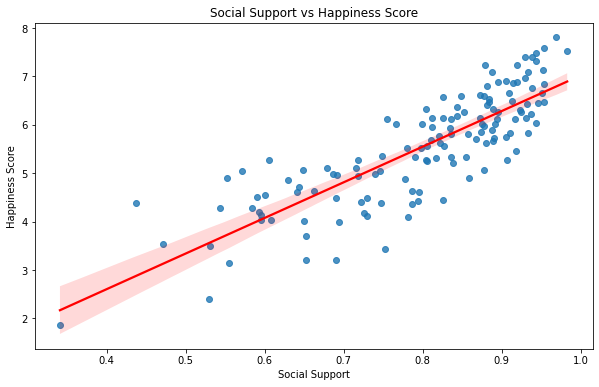

In [61]:
plt.figure(figsize=[10,6])
sns.regplot(x='Social support', y='Happiness Score', data=df,line_kws={'color': 'red'})
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
plt.title('Social Support vs Happiness Score')
plt.show()


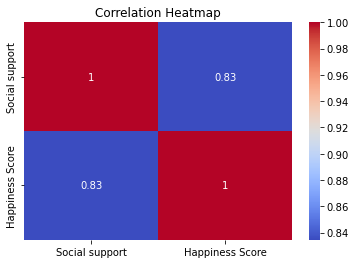

In [65]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [66]:
correlation_matrix = df[['Social support', 'Happiness Score']].corr()
print(correlation_matrix)


                 Social support  Happiness Score
Social support         1.000000         0.834532
Happiness Score        0.834532         1.000000


* The correlation coefficient between Social support and Happiness Score is approximately 0.835, which is a strong positive correlation. This suggests that higher levels of social support are generally associated with higher happiness scores across countries.

### 2.	Is Healthy life expectancy a significant factor in a country’s happiness?


In [67]:
correlation_matrix = df[['Healthy life expectancy', 'Happiness Score']].corr()
print(correlation_matrix)


                         Healthy life expectancy  Happiness Score
Healthy life expectancy                 1.000000         0.746078
Happiness Score                         0.746078         1.000000


The correlation coefficient between Healthy life expectancy and Happiness Score is approximately 0.746, which is quite strong and positive. This indicates that there is a significant, positive relationship between the two variables. In simpler terms, countries with higher healthy life expectancies tend to also have higher happiness scores.

#### Interpretation:
This result suggests that longer healthy life expectancy is associated with higher levels of happiness in countries. The positive correlation coefficient close to 0.75 shows a strong relationship but not a perfect one, indicating other factors are also in play when determining a country's happiness score. Nonetheless, the data does strongly imply that initiatives aimed at improving a population's health and increasing life expectancy could potentially also enhance a country's overall happiness levels.

Given the strength and direction of the correlation, policymakers might consider focusing on healthcare improvements as a way to potentially boost national happiness. Improved healthcare could lead to longer, healthier lives, which according to this data analysis, is associated with higher levels of happiness.

### What is the influence of other Other Factors

In [68]:

corr_matrix = df[["Happiness Score", "Freedom to make life choices", "Generosity", "Perceptions of corruption"]].corr()

print("Correlation Matrix:")
print(corr_matrix)


Correlation Matrix:
                              Happiness Score  Freedom to make life choices  \
Happiness Score                      1.000000                      0.662924   
Freedom to make life choices         0.662924                      1.000000   
Generosity                           0.044082                      0.170229   
Perceptions of corruption           -0.471911                     -0.383786   

                              Generosity  Perceptions of corruption  
Happiness Score                 0.044082                  -0.471911  
Freedom to make life choices    0.170229                  -0.383786  
Generosity                      1.000000                  -0.122653  
Perceptions of corruption      -0.122653                   1.000000  


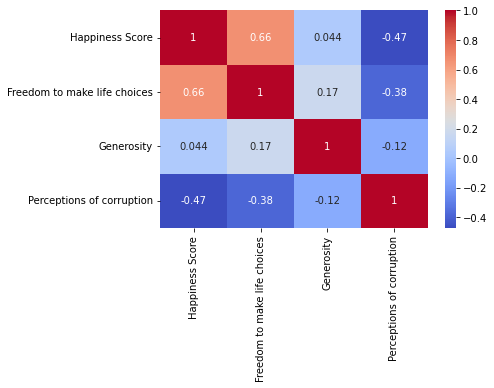

In [69]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.show()



* Freedom to Make Life Choices: The correlation coefficient between "Happiness Score" and "Freedom to make life choices" is 0.66, indicating a moderate to strong positive correlation. This suggests that in countries where people feel they have the freedom to make life choices, the happiness score tends to be higher. Countries where citizens feel free to make their own life choices generally have higher happiness levels.

* Generosity: The correlation between "Happiness Score" and "Generosity" is very weak (0.044). This suggests that generosity is not a strong predictor of happiness at the national level, based on this dataset. This could imply that other factors like economic stability, health, and freedom are more important for happiness at a national level.

* Perceptions of Corruption: There is a moderate negative correlation of -0.47 between "Happiness Score" and "Perceptions of corruption." This suggests that in countries where corruption is perceived to be higher, the happiness score tends to be lower.This suggests that corruption or the perception thereof is detrimental to a nation's overall well-being.




### 	How do the top 10 happiest countries differ from the bottom 10 in terms of GDP, social support, and other factors?

In [70]:
# sort the data 
df_sorted = df.sort_values('Happiness Score', ascending=False)

# Get top 10 and bottom 10 from thee srted data 
top_10 = df_sorted.head(10)
bottom_10 = df_sorted.tail(10)

# summmaey statistics
desc_top_10 = top_10.describe()
desc_bottom_10 = bottom_10.describe()
print("Average values for top 10 happiest countries:")
print(desc_top_10.loc['mean'])

print("\nAverage values for bottom 10 happiest countries:")
print(desc_bottom_10.loc['mean'])


Average values for top 10 happiest countries:
Happiness Score                  7.409700
Logged GDP per capita           10.968800
Social support                   0.941200
Healthy life expectancy         71.727200
Freedom to make life choices     0.911500
Generosity                       0.104800
Perceptions of corruption        0.350000
Ladder score in Dystopia         1.778000
GDP_Zscore                       1.262798
Happiness_Zscore                 1.646389
Name: mean, dtype: float64

Average values for bottom 10 happiest countries:
Happiness Score                  3.195100
Logged GDP per capita            7.978100
Social support                   0.587000
Healthy life expectancy         57.224400
Freedom to make life choices     0.642500
Generosity                      -0.002100
Perceptions of corruption        0.787400
Ladder score in Dystopia         1.778000
GDP_Zscore                      -1.223468
Happiness_Zscore                -2.064427
Name: mean, dtype: float64


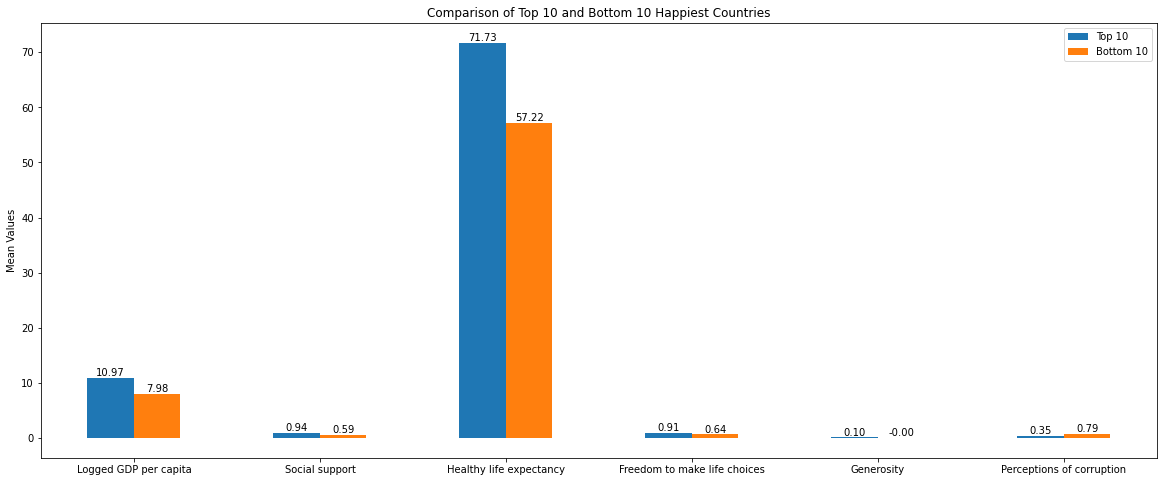

In [71]:

features = ['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Calculate the mean for top 10 and bottom 10 of the ones i need 
mean_top_10 = top_10[features].mean()
mean_bottom_10 = bottom_10[features].mean()

# DataFrame for easy plotting
plot_df = pd.DataFrame({'Top 10': mean_top_10, 'Bottom 10': mean_bottom_10})

ax = plot_df.plot.bar(figsize=(20, 8), rot=0)
plt.ylabel('Mean Values')
plt.title('Comparison of Top 10 and Bottom 10 Happiest Countries')

# bar labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()


#### The average values for the top 10 and bottom 10 happiest countries revealed some interesting trends:

* Happiness Score: The top 10 happiest countries have an average Happiness Score of 7.41, while the bottom 10 have an average score of just 3.20, showcasing a stark contrast.

* GDP: The average GDP for the top 10 is much higher at 10.97 compared to 7.98 for the bottom 10. This suggests that economic factors have a significant role in determining happiness.

* Social Support: There's a noticeable difference here too. The top 10 have an average score of 0.94, while the bottom 10 have 0.59. This could indicate the importance of a strong social support system for well-being.

* Healthy Life Expectancy: The top 10 countries have a significantly higher average healthy life expectancy of 71.7 years compared to 57.2 years in the bottom 10.

* Freedom to Make Life Choices: This factor is also considerably higher in the top 10 countries (0.91) than in the bottom 10 countries (0.64).

* Generosity: Interestingly, generosity does not show a huge gap, however, it's still positive in the top 10 (0.10) and slightly negative in the bottom 10 (-0.002).

* Perceptions of Corruption: The top 10 countries have a lower average perception of corruption (0.35) compared to the bottom 10 (0.79).

* GDP Z-score: The Z-score for GDP is significantly higher in the top 10 countries (1.26) than in the bottom 10 countries (-1.22), confirming the role of economic well-being.

* Happiness Z-score: The Z-score for happiness is notably higher in the top 10 countries (1.65) compared to the bottom 10 (-2.06).


* Overall, these averages suggest that economic factors, social support, and freedom significantly contribute to happiness, while perceptions of corruption have a detrimental effect. Generosity, on the other hand, doesn't seem to be a major deciding factor between the top and bottom 10 happiest countries.

## REGRESSION ANALYSIS

## OBjective 

The objective of this machine learning technique is to develop a predictive model using supervised Machine Learning Algorithm to accurately estimate the Happiness Score of countries based on a set of variables Gdp, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, and corruption. By creating a robust regression model, I aim to identify the key factors that contribute to the overall happiness of a country's population and assess the strength of their influence. The model will be validated using statistical metrics: R-squared, Mean Absolute Error (MAE), and Root Mean Square Error (RMSE) to ensure its reliability and accuracy. The ultimate goal is to understand how these features contribute to happiness and to offer a data-driven tool for policy interventions aimed at increasing national well-being.

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


#data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#evaluation Metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [73]:
rg = df.copy()
rg.head()

,Country,Happiness Score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Continent,ISO_Code,GDP_Zscore,Happiness_Zscore
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,Europe,FI,1.115818,1.993557
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,1.778,Europe,DK,1.257145,1.801616
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,1.778,Europe,IS,1.202277,1.752309
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,Asia,IL,0.988624,1.702123
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,1.778,Europe,NL,1.240518,1.640490


In [74]:
rg.columns

Index(['Country', 'Happiness Score', 'Logged GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia', 'Continent',
       'ISO_Code', 'GDP_Zscore', 'Happiness_Zscore'],
      dtype='object')

In [75]:
rg1 = rg[['Country', 'Logged GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']]

target = rg[['Happiness Score']]

## Normalization ( Using Z score Method )

In [76]:

scaler = StandardScaler()


rg_scaled = scaler.fit_transform(rg[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']])
target_scaled = scaler.fit_transform(rg[['Happiness Score']])


### Supervised Machine learning Model

In [77]:
#lets split into train and test

X_train,  X_test, y_train, y_test = train_test_split(rg_scaled, target_scaled,test_size = 0.2, random_state=42)

In [78]:


# Regression model
lr_model = LinearRegression()

# fit training data

lr_model.fit(X_train, y_train)

# predictions on the test set

y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
coefficients = lr_model.coef_
print(f"Coefficients: {coefficients}")


Mean Squared Error: 0.18397885364975022
Coefficients: [[ 0.18692919  0.49497624  0.07682532  0.20561762  0.02945454 -0.1189624 ]]


The coefficients represent the change in the dependent variable (Happiness Score, in this case) for a one-unit change in the predictor variables, assuming all other variables are held constant.

* Gdp: A one-unit increase is associated with an increase in the happiness score of 0.187.
* Social support: A one-unit increase is associated with an increase in the happiness score of 0.495.
* Healthy life expectancy: A one-unit increase is associated with an increase in the happiness score of 0.077.
* Freedom to make life choices: A one-unit increase is associated with an increase in the happiness score of 0.206.
* Generosity: A one-unit increase is associated with an increase in the happiness score of 0.029.
* Perceptions of corruption: A one-unit increase is associated with a decrease in the happiness score of -0.119.

### R2 SCORE

In [79]:
r2_score(y_test, y_pred)

0.808814933332165

R 
2
  score of 0.809 is relatively high, suggesting that approximately 80.9% of the variability in the happiness score can be explained by the model. This is a good indication it fits data quite well and should be relatively accurate for making predictions, assuming that the assumptions of the model are met and the data is representative.

### Examining the Residuals

Examining residuals is a crucial step in validating a regression model. Residuals are the differences between the observed values and the values predicted by the model. A well-behaved residual plot will be randomly scattered around the horizontal axis, indicating that the model is well-fitted to the data.


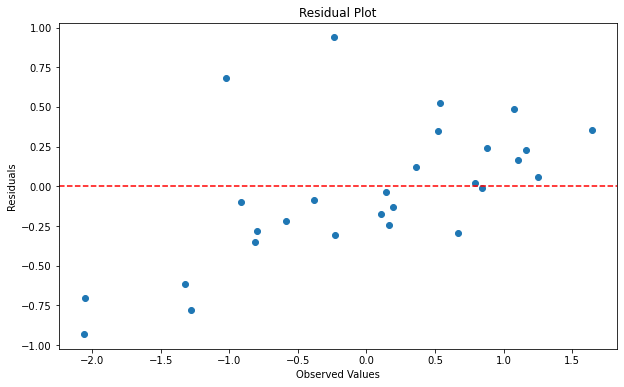

In [80]:
residuals = y_test - y_pred


plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Observed Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


Randomly distributed residuals usually indicate that a linear regression model is appropriate for the data. It also validates the assumption of homoscedasticity, which means that the error variance is constant across all levels of the independent variables.

## Summary of Insights:
### Data Source and Objective:

I utilized the World Happiness Report dataset from Kaggle to understand the factors affecting happiness across various countries.
The objective was to create a predictive model using supervised machine learning techniques to predict the Happiness Score based on six independent variables: Gdp, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, and Perceptions of corruption.

#### Exploratory Data Analysis (EDA):
Preliminary data analysis revealed notable differences in Happiness Scores across continents, with Europe and Oceania ranking highest and Africa ranking the lowest.

Social support and GDP  were the most significant factors affecting happiness. 

#### Model Building and Evaluation:
* After normalizing the data using the Z-Score method, I proceeeded and employed a Linear Regression model.
* The model showed an R-squared value of approximately 0.81, indicating that about 81% of the data fits the regression model.
* The Mean Squared Error was found to be 0.184, which suggests a reasonable level of error given the scale of the Happiness Scores.
* Residual plots did not show any particular pattern, indicating that the model's assumptions are not violated significantly.

#### Recommendations:
* Given the strong positive influence of GDP and Social support on Happiness Scores, policy makers should focus on economic policies that enhance GDP and social policies that improve the sense of community and belonging among citizens.

* It might be beneficial to include more variables like education, employment rate to improve the model's predictive power.
* While the current dataset is robust, more recent data can be included for up-to-date insights. Might be to see how these variables are influenced by global phenomena like pandemics or economic crises.

* This model can serve as a preliminary tool for various organizations or governments to understand the factors affecting happiness and take corrective actions accordingly.

By following these insights and recommendations, we can aim for a more comprehensive understanding and promotion of happiness on a global scale.